### Import the necessary packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

### Import the datasets

In [3]:
matches = pd.read_csv('IPL Matches 2008-2020.csv')

In [4]:
ball_by_ball = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

### Display the first five rows of each of the datframes

In [6]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [7]:
ball_by_ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


### The matches dataframe has 816 rows and 17 columns

In [8]:
matches.shape

(816, 17)

### The ball_by_ball dataframe has 193468 rows and 18 columns

In [9]:
ball_by_ball.shape

(193468, 18)

### The matches dataframe has 13 missing values in the city column, 4 in the player_of_match column, 17 in the result_margin, 4 in the eliminator column and 797 in the method column

In [14]:
matches.isna().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

### This shows that there are 183973 missing values in the dismissal_kind column, 183973 in the player_dismissed column, 186684 in the fielder column, 183235 in the extras_type column and 191 in the bowling_team column     

In [15]:
ball_by_ball.isna().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

### This shows that the matches dataframe has no duplicated rows

In [17]:
matches[matches.duplicated()].shape

(0, 17)

### This shows that there is only one duplicated row in the dataframe ball_by_ball

In [19]:
ball_by_ball[ball_by_ball.duplicated()].shape

(1, 18)

### This shows the various columns in the matches dataframe

In [20]:
matches.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

### This shows the various columns in the ball-by_ball dataframe

In [21]:
ball_by_ball.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

### This shows the disinct cities in the dataframe

In [5]:
matches.city.unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

### This shows the distinct teams in the league

In [6]:
matches.team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

### This shows the frequency dsitribution for the toss_winner column

In [11]:
matches.toss_winner.value_counts()

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

### This shows the toss_winner with the highest frequency i.e. the most toss winner award won

In [13]:
matches.toss_winner.value_counts().index[0]

'Mumbai Indians'

### This shows the player_of_match with the highest frequency i.e. the most player of the match award won

In [15]:
matches.player_of_match.value_counts().index[0]

'AB de Villiers'

### This shows the distinct batsmen in the league

In [17]:
ball_by_ball.batsman.unique()

array(['RT Ponting', 'BB McCullum', 'DJ Hussey', 'Mohammad Hafeez',
       'SC Ganguly', 'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke',
       'P Kumar', 'Z Khan', 'SB Joshi', 'W Jaffer', 'JH Kallis',
       'R Dravid', 'V Kohli', 'K Goel', 'MEK Hussey', 'JR Hopes',
       'SK Raina', 'JDP Oram', 'S Badrinath', 'PA Patel', 'ML Hayden',
       'MS Dhoni', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'T Kohli', 'YK Pathan', 'S Dhawan', 'G Gambhir',
       'SK Warne', 'D Salunkhe', 'SK Trivedi', 'V Sehwag', 'SR Watson',
       'M Kaif', 'DS Lehmann', 'RA Jadeja', 'M Rawat', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul',
       'LRPL Taylor', 'WP Saha', 'AS Yadav', 'A Symonds', 'SB Bangar',
       'WPUJC Vaas', 'RP Singh', 'AC Gilchrist', 'Y Venugopal Rao',
       'VVS Laxman', 'RG Sharma', 'SB Styris', 'LR Shukla', 'PP Chawla',
       'Kamran Akmal', 'DPMD Jayawardene'

### This gets the data of the batsman named V Kohli

In [22]:
vkohli_df = ball_by_ball[ball_by_ball.batsman == 'V Kohli']

### This shows that that the most of V kohli's batsman runs are 0 with 1625, 1 with 1919, 2 with 346, 3 with 13, 4 with 504, 6 with 202 using the groupby approach 

In [39]:
vkohli_df.groupby('batsman_runs')['batsman'].count()

batsman_runs
0    1625
1    1919
2     346
3      13
4     504
6     202
Name: batsman, dtype: int64

### This shows that that the most of V kohli's batsman runs are 0 with 1625, 1 with 1919, 2 with 346, 3 with 13, 4 with 504, 6 with 202 using the value counts approach 

In [24]:
vkohli_df['batsman_runs'].value_counts()

1    1919
0    1625
4     504
2     346
6     202
3      13
Name: batsman_runs, dtype: int64

### This shows that V Kohli is mostly dissmissed by caught 105, bowled 30, run out 15, lbw 7, stumped 3, caught and bowled 3

In [25]:
vkohli_df['dismissal_kind'].value_counts()

caught               105
bowled                30
run out               15
lbw                    7
stumped                3
caught and bowled      3
Name: dismissal_kind, dtype: int64

### This gets the total runs of V kohli and stores it in a dataframe

In [32]:
total_run = vkohli_df.groupby('total_runs')['batsman_runs'].sum().reset_index()

In [33]:
total_run

,total_runs,batsman_runs
0,0,0
1,1,1912
2,2,697
3,3,41
4,4,2016
5,5,0
6,6,1206
7,7,6


### This removes all the batsman runs with value of 0

In [41]:
total_run = total_run[~total_run.batsman_runs.isin([0])]

In [42]:
total_run

,total_runs,batsman_runs
1,1,1912
2,2,697
3,3,41
4,4,2016
6,6,1206
7,7,6


### This displays the total runs data in a pie chart form

In [43]:
px.pie(data_frame=total_run, names='total_runs', values='batsman_runs', hole=0.3)

### This displays the datatypes of the various columns in the matches datatype

In [44]:
matches.dtypes

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
method              object
umpire1             object
umpire2             object
dtype: object

### This changes the datatype of the date column from being a string to a datetime

In [46]:
matches['date'] = pd.to_datetime(matches.date)

### This displays the first row of the dataframe

In [47]:
matches.head(1)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen


### This displays the datatypes of the various columns in the matches datatype

In [48]:
matches.dtypes

id                          int64
city                       object
date               datetime64[ns]
player_of_match            object
venue                      object
neutral_venue               int64
team1                      object
team2                      object
toss_winner                object
toss_decision              object
winner                     object
result                     object
result_margin             float64
eliminator                 object
method                     object
umpire1                    object
umpire2                    object
dtype: object

### This get the years from the date column and stores it in a new column called season

In [50]:
matches['season'] = matches.date.dt.year

### This displays the first row of the dataframe

In [51]:
matches.head(1)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008


### This gets the various information about each season's bat and field values using the groupby approach

In [56]:
season_info = matches.groupby(['season', 'toss_decision'])['id'].count().reset_index().rename(columns={'id':'count'})

In [57]:
season_info

,season,toss_decision,count
0,2008,bat,26
1,2008,field,32
2,2009,bat,35
3,2009,field,22
4,2010,bat,39
5,2010,field,21
6,2011,bat,25
7,2011,field,48
8,2012,bat,37
9,2012,field,37


### This gets the various information about each season's bat and field values using the value_counts approach

In [69]:
season_info_ = matches[['season', 'toss_decision']].value_counts().reset_index().rename(columns={0:'count'})

In [71]:
season_info_

,season,toss_decision,count
0,2019,field,50
1,2018,field,50
2,2016,field,49
3,2017,field,48
4,2011,field,48
5,2013,bat,45
6,2014,field,41
7,2010,bat,39
8,2012,bat,37
9,2012,field,37


### This creates a barplot using the season_info dataframe for both the field and bat data

<AxesSubplot: xlabel='season', ylabel='count'>

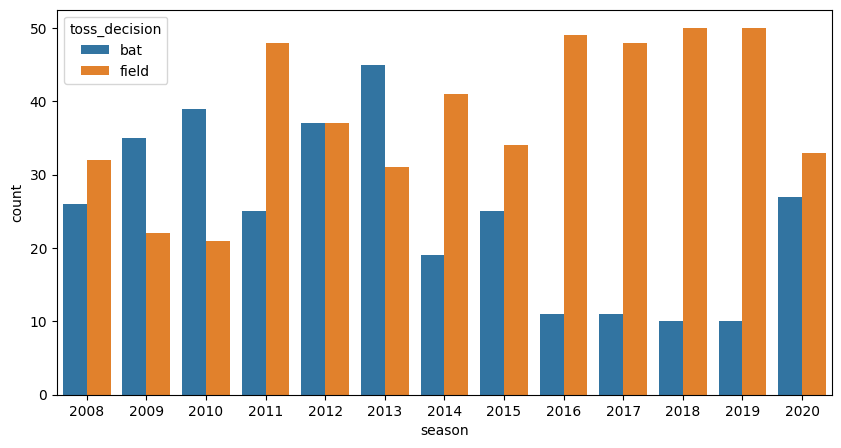

In [72]:
plt.figure(figsize=(10, 5))
sns.barplot(data=season_info, x='season', y='count', hue='toss_decision')

### This creates a barplot using the season_info_ dataframe for both the field and bat data

<AxesSubplot: xlabel='season', ylabel='count'>

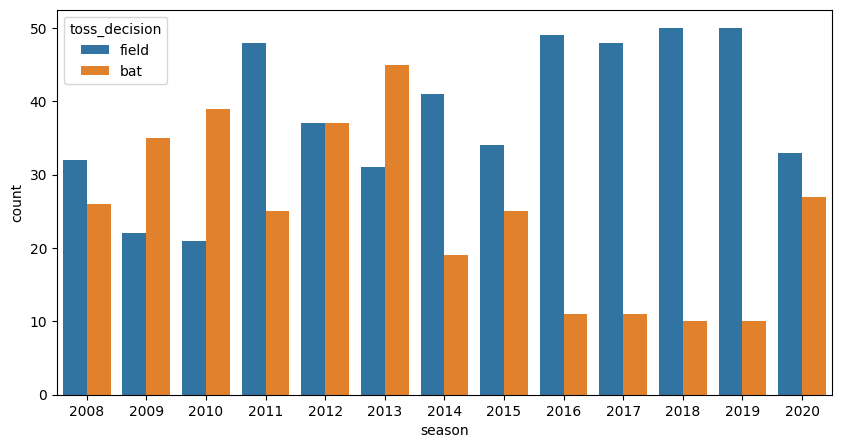

In [73]:
plt.figure(figsize=(10, 5))
sns.barplot(data=season_info_, x='season', y='count', hue='toss_decision')

### This will determine whether the toss winner and the winner are the same. If they are the same then store as Yes else store as No Option 1

In [87]:
results = []
for row in matches.values:
    toss_winner = row[8]
    winner = row[10]
    if toss_winner == winner:
        result = 'Yes'
    else:
        result = 'No'
    results.append(result)

### This will determine whether the toss winner and the winner are the same. If they are the same then store as Yes else store as No Option 2

In [102]:
matches['results_'] = np.where(matches.toss_winner == matches.winner, 'Yes', 'No')

### Save the reslt returned in a new column called results

In [89]:
matches['results'] = results

### Display the first row of the matches dataframe

In [103]:
matches.head(1)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season,results,results_
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008,No,No


### The number of times where the toss winner was the winner is 418 and the oposite is 398

In [105]:
toss_win_info = matches['results'].value_counts().reset_index().rename(columns={'index': 'results', 'results': 'count'})

In [106]:
toss_win_info_ = matches['results_'].value_counts().reset_index().rename(columns={'index': 'results', 'results': 'count'})

In [107]:
toss_win_info

,results,count
0,Yes,418
1,No,398


In [108]:
toss_win_info_

,results,results_
0,Yes,418
1,No,398


### Use the info acquired to plot a pie chart

In [99]:
px.pie(data_frame=toss_win_info, names='results', values='count')

### This gets the winner of the league for each year and stores it in a dictionary with the key being the season year and the value being the winner of the league

In [120]:
data = {}
winners = []
for season in sorted(matches.season.unique()):
    df = matches[matches.season == season]
    data[season] = df.winner.tail(1).values[0]

In [121]:
data

{2008: 'Rajasthan Royals',
 2009: 'Deccan Chargers',
 2010: 'Chennai Super Kings',
 2011: 'Chennai Super Kings',
 2012: 'Kolkata Knight Riders',
 2013: 'Mumbai Indians',
 2014: 'Kolkata Knight Riders',
 2015: 'Mumbai Indians',
 2016: 'Sunrisers Hyderabad',
 2017: 'Mumbai Indians',
 2018: 'Chennai Super Kings',
 2019: 'Mumbai Indians',
 2020: 'Mumbai Indians'}

In [118]:
from collections import Counter

### This gets the frequency distribution for the winners of the league and we can see that Mumbai Indians have won 5 times, Chennai Super Kings have won 3 times, Kolkata Knight Riders have won 2 times, Rajasthan Royals have won once same forDeccan Chargers and Sunrisers Hyderabad 

In [122]:
Counter(data.values())

Counter({'Mumbai Indians': 5,
         'Chennai Super Kings': 3,
         'Kolkata Knight Riders': 2,
         'Rajasthan Royals': 1,
         'Deccan Chargers': 1,
         'Sunrisers Hyderabad': 1})

### This finds the number of matches each team  played as a home team

In [127]:
matches.team1.value_counts()

Royal Challengers Bangalore    108
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Delhi Daredevils                83
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   23
Delhi Capitals                  19
Gujarat Lions                   16
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Rising Pune Supergiant           7
Name: team1, dtype: int64

### This finds the number of matches each team  played as an away team

In [128]:
matches.team2.value_counts()

Mumbai Indians                 106
Kings XI Punjab                 98
Kolkata Knight Riders           97
Rajasthan Royals                91
Royal Challengers Bangalore     87
Chennai Super Kings             84
Delhi Daredevils                78
Sunrisers Hyderabad             65
Deccan Chargers                 36
Pune Warriors                   23
Gujarat Lions                   14
Delhi Capitals                  14
Rising Pune Supergiant           9
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Name: team2, dtype: int64

### This is the total matches played by each team 

In [134]:
team_matches_info = (matches.team1.value_counts() + matches.team2.value_counts()).reset_index().rename(columns={'index':'team', 0:'matches_played'})

In [135]:
team_matches_info

,team,matches_played
0,Chennai Super Kings,178
1,Deccan Chargers,75
2,Delhi Capitals,33
3,Delhi Daredevils,161
4,Gujarat Lions,30
5,Kings XI Punjab,190
6,Kochi Tuskers Kerala,14
7,Kolkata Knight Riders,192
8,Mumbai Indians,203
9,Pune Warriors,46


### This gets the wins of each team 

In [138]:
wins = matches.winner.value_counts().reset_index().rename(columns={'index':'team', 'winner': 'wins'})

In [139]:
wins

,team,wins
0,Mumbai Indians,120
1,Chennai Super Kings,106
2,Kolkata Knight Riders,99
3,Royal Challengers Bangalore,91
4,Kings XI Punjab,88
5,Rajasthan Royals,81
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,66
8,Deccan Chargers,29
9,Delhi Capitals,19


### This joins the two dataframes i.e. the one about total wins of a team and the total matches played by each team using the merge function on the basis of the column team and on the condition of inner

In [143]:
team_data = team_matches_info.merge(wins, on='team')

In [144]:
team_data

,team,matches_played,wins
0,Chennai Super Kings,178,106
1,Deccan Chargers,75,29
2,Delhi Capitals,33,19
3,Delhi Daredevils,161,67
4,Gujarat Lions,30,13
5,Kings XI Punjab,190,88
6,Kochi Tuskers Kerala,14,6
7,Kolkata Knight Riders,192,99
8,Mumbai Indians,203,120
9,Pune Warriors,46,12


### This creates a vertically stacked bar chart for the wins and matches played columns 

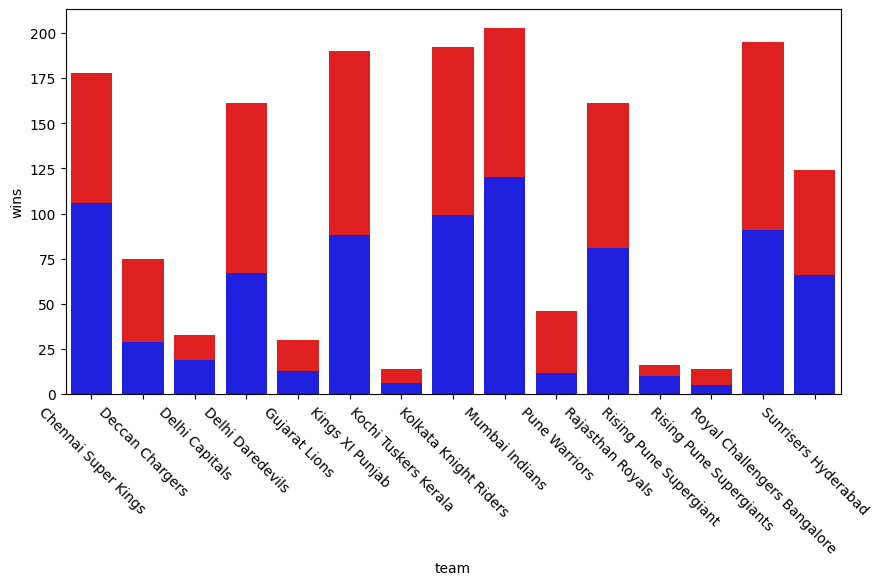

In [189]:
plt.figure(figsize=(10, 5))
sns.barplot(data=team_data, x='team', y='matches_played', color='red')
sns.barplot(data=team_data, x='team', y='wins', color='blue')
plt.xticks(rotation=-45)
plt.show()

### This sets the team column as the index

In [154]:
team_data_ = team_data.set_index('team')

### This creates a bar chart for the matches played and wins columns and stack them side by side

<AxesSubplot: xlabel='team'>

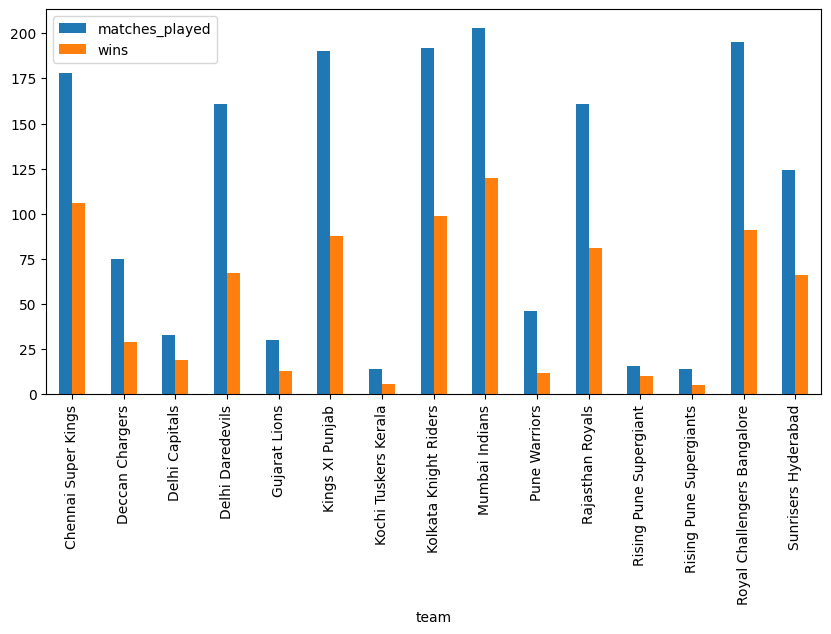

In [191]:
team_data_.plot(kind='bar', stacked=False, figsize=(10, 5))

In [182]:
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

### This creates a bar chart using the matches played and wins columns using plotly's graph_objs and iplot

In [185]:
trace1 = go.Bar(
    x = team_data['team'] , 
    y = team_data['matches_played'] , 
    name = 'Total Matches'
)


trace2 = go.Bar(
    x = team_data['team'] , 
    y = team_data['wins'] , 
    name = 'Matches won'
)


In [186]:
data = [trace1, trace2]

In [187]:
iplot(data)